In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings

In [35]:
df = pd.read_csv('Cars.csv')
df.head(7)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport
5,26,Male,1,0,4,12.3,4.8,1,Public Transport
6,28,Male,1,0,5,14.4,5.1,0,Private Transport


In [36]:
df.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000


In [37]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [38]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Transport'] = df['Transport'].replace({'Public Transport': 0, 'Private Transport': 1})

In [39]:
df.head(7)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,0
1,23,0,1,0,4,8.3,3.3,0,0
2,29,1,1,0,7,13.4,4.1,0,0
3,28,0,1,1,5,13.4,4.5,0,0
4,27,1,1,0,4,13.4,4.6,0,0
5,26,1,1,0,4,12.3,4.8,1,0
6,28,1,1,0,5,14.4,5.1,0,1


In [40]:
df.corr()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
Age,1.000000,0.098855,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311,0.305710
Gender,0.098855,1.000000,0.018214,0.094890,0.086022,0.096262,0.054206,0.234594,-0.100762
Engineer,0.091935,0.018214,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924,0.037465
MBA,-0.029090,0.094890,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358,-0.081139
Work Exp,0.932236,0.086022,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867,0.362624
Salary,0.860673,0.096262,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095,0.423261
Distance,0.352872,0.054206,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084,0.403991
license,0.452311,0.234594,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000,0.423397
Transport,0.305710,-0.100762,0.037465,-0.081139,0.362624,0.423261,0.403991,0.423397,1.000000


<AxesSubplot: >

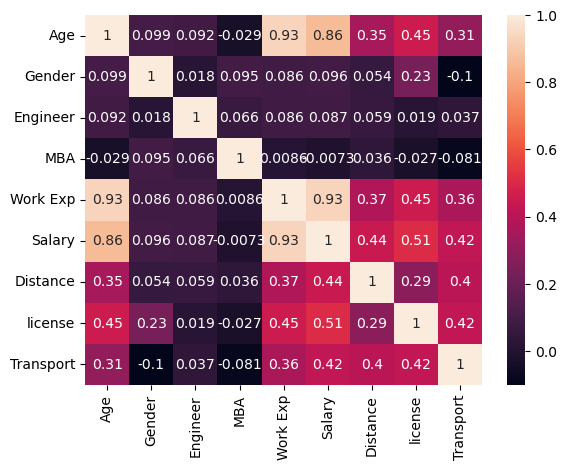

In [41]:
corr=df.corr()
# plt.gcf().set_size_inches(15, 8))
# fig, ax = plt.subplot()
sns.heatmap(corr,ax=plt.subplot(),annot=True)

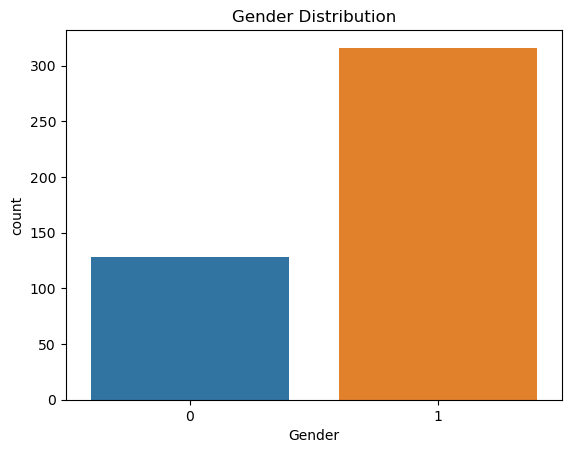

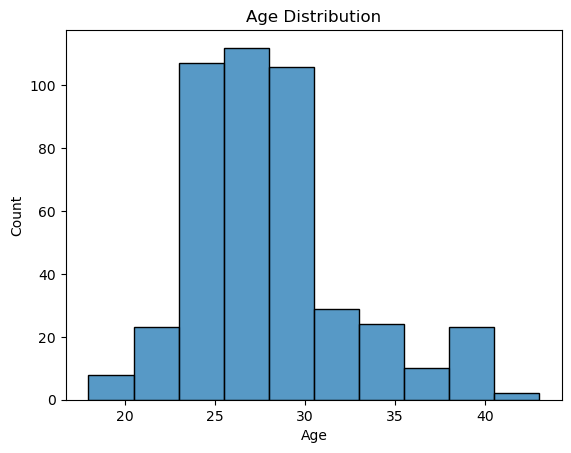

In [42]:
# Univariate analysis
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.histplot(x='Age', data=df, bins=10)
plt.title('Age Distribution')
plt.show()

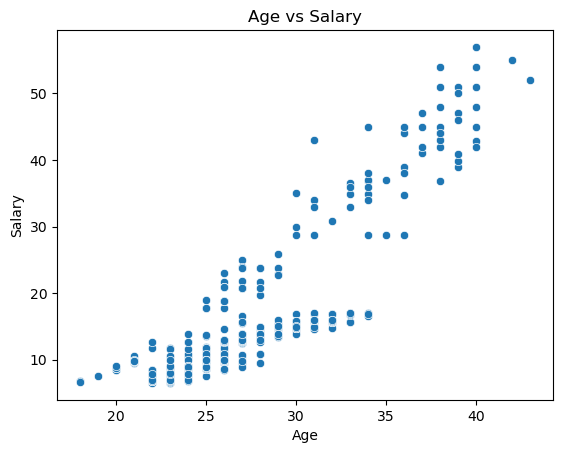

In [43]:
# Bivariate analysis
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your feature columns and 'y' contains your target column
X = df.drop(columns=['Transport'])  # Remove the target column
y = df['Transport']

# Splitting the data into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model: Logistic Regression
Training Performance:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       214
           1       0.78      0.54      0.64        96

    accuracy                           0.81       310
   macro avg       0.80      0.74      0.75       310
weighted avg       0.81      0.81      0.80       310

Test Performance:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        86
           1       0.74      0.60      0.67        48

    accuracy                           0.78       134
   macro avg       0.77      0.74      0.75       134
weighted avg       0.78      0.78      0.78       134

Confusion Matrix:
[[76 10]
 [19 29]]
Model: Linear Discriminant Analysis
Training Performance:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       214
           1       0.80      0.53      0.64        96

    accuracy        

C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Model: Random Forest
Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00        96

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

Test Performance:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        86
           1       0.86      0.75      0.80        48

    accuracy                           0.87       134
   macro avg       0.86      0.84      0.85       134
weighted avg       0.87      0.87      0.86       134

Confusion Matrix:
[[80  6]
 [12 36]]
Model: Gradient Boosting
Training Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       214
           1       1.00      0.93      0.96        96

    accuracy                         

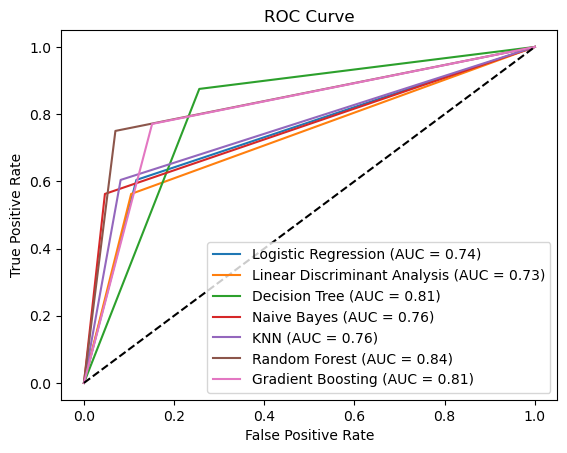

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings

# Create a dictionary to store the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Training and evaluating the models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    print(f"Model: {name}")
    print("Training Performance:")
    print(classification_report(y_train, y_pred_train))
    print("Test Performance:")
    print(classification_report(y_test, y_pred_test))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix:")
    print(cm)

    # ROC-AUC Curve and Score
    roc_auc = roc_auc_score(y_test, y_pred_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

# Create a dictionary to store the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create a DataFrame to store model metrics
metrics_df = pd.DataFrame(columns=['Model', 'Phase', 'Precision', 'Recall', 'F1-Score', 'AUC'])

C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_63472\1274121939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_63472\1274121939.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_63472\1274121939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_63472\1274121939.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_63472\1

                           Model     Phase  Precision    Recall  F1-Score  \
0            Logistic Regression  Training   0.805673  0.809677  0.798786   
1            Logistic Regression   Testing   0.779793  0.783582  0.777769   
2   Linear Discriminant Analysis  Training   0.810818  0.812903  0.800701   
3   Linear Discriminant Analysis   Testing   0.772921  0.776119  0.767428   
4                  Decision Tree  Training   1.000000  1.000000  1.000000   
5                  Decision Tree   Testing   0.830966  0.805970  0.809721   
6                    Naive Bayes  Training   0.797293  0.796774  0.778067   
7                    Naive Bayes   Testing   0.822929  0.813433  0.801750   
8                            KNN  Training   0.836834  0.835484  0.825201   
9                            KNN   Testing   0.805919  0.805970  0.798438   
10                 Random Forest  Training   1.000000  1.000000  1.000000   
11                 Random Forest   Testing   0.849299  0.850746  0.849198   

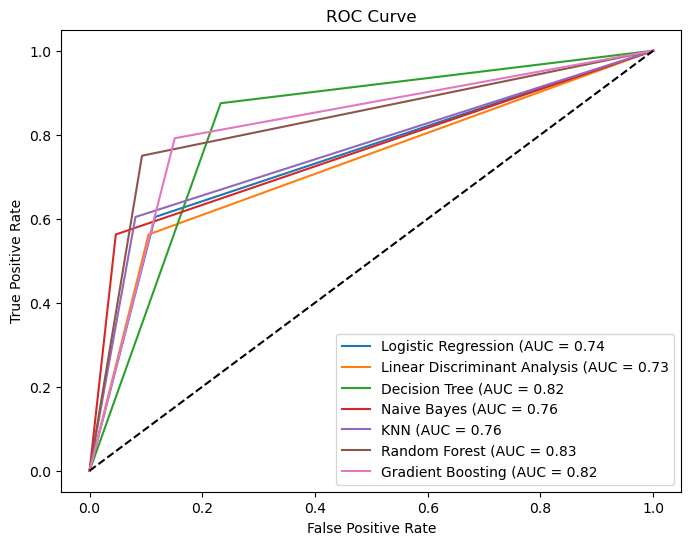

In [59]:
# Training and evaluating the models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate classification report metrics
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    test_report = classification_report(y_test, y_pred_test, output_dict=True)

    # Calculate ROC-AUC score
    auc = roc_auc_score(y_test, y_pred_test)

    # Store metrics in the DataFrame
    metrics_df = metrics_df.append({
        'Model': name,
        'Phase': 'Training',
        'Precision': train_report['weighted avg']['precision'],
        'Recall': train_report['weighted avg']['recall'],
        'F1-Score': train_report['weighted avg']['f1-score'],
        'AUC': auc
    }, ignore_index=True)

    metrics_df = metrics_df.append({
        'Model': name,
        'Phase': 'Testing',
        'Precision': test_report['weighted avg']['precision'],
        'Recall': test_report['weighted avg']['recall'],
        'F1-Score': test_report['weighted avg']['f1-score'],
        'AUC': auc
    }, ignore_index=True)

# Display the metrics DataFrame
print(metrics_df)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_pred_test = model.predict(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_test)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [60]:
metrics_df

,Model,Phase,Precision,Recall,F1-Score,AUC
0,Logistic Regression,Training,0.805673,0.809677,0.798786,0.743944
1,Logistic Regression,Testing,0.779793,0.783582,0.777769,0.743944
2,Linear Discriminant Analysis,Training,0.810818,0.812903,0.800701,0.728924
3,Linear Discriminant Analysis,Testing,0.772921,0.776119,0.767428,0.728924
4,Decision Tree,Training,1.000000,1.000000,1.000000,0.821221
5,Decision Tree,Testing,0.830966,0.805970,0.809721,0.821221
6,Naive Bayes,Training,0.797293,0.796774,0.778067,0.757994
7,Naive Bayes,Testing,0.822929,0.813433,0.801750,0.757994
8,KNN,Training,0.836834,0.835484,0.825201,0.761386
9,KNN,Testing,0.805919,0.805970,0.798438,0.761386


In [52]:
# Create a dictionary to store AUC scores for each model
auc_scores = {}

# Calculate and store AUC scores for each model
for name, model in models.items():
    y_pred_test = model.predict(X_test_scaled)
    auc = roc_auc_score(y_test, y_pred_test)
    auc_scores[name] = auc

# Find the model with the highest AUC score
best_model = max(auc_scores, key=auc_scores.get)

print("AUC Scores:")
for name, auc in auc_scores.items():
    print(f"{name}: {auc:.2f}")

print(f"The best model is: {best_model} with an AUC of {auc_scores[best_model]:.2f}")

AUC Scores:
Logistic Regression: 0.74
Linear Discriminant Analysis: 0.73
Decision Tree: 0.81
Naive Bayes: 0.76
KNN: 0.76
Random Forest: 0.84
Gradient Boosting: 0.81
The best model is: Random Forest with an AUC of 0.84


C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Thankyou